# Fertility Rate, Life Expectancy, Happiness and Suicide

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

In this analysis, we're going to explore 4 different datasets: fertility rate, life expectancy, happiness score and suicide rate.
The first two dataset contain the fertility rates (number of children that would be born to a woman over her lifetime) and life expectancy (the number of years a person can expect to live) for 202 countries and 195 years, respectively, over the course of 3 centuries. for the firtility rate the years starting from 1800 up to 2014 are based on actual number, and the years from 2015 to 2100 are forecast of future fertility rate. For life expectancy the years (1800-2016) are real life statistics and the years (2017-2100) are forcasted. For more accurate results we're going to do the analysis for only the last century (1921-2020). <br />
For the third dataset, happiness score is the national average response to the question of life evaluations asking the following “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder. Gapminder has converted this indicator's scale from 0 to 100 to easily communicate it in terms of percentage.
The data covers 163 countries over 15 years (2005-2019). <br />
The last dataset, suicide rate, is the number of mortality due to self-inflected injury per 100,000 standard population. 118 countries were recorded in the dataset for 67 years (1950-2016).

In this analysis, we'll try to answer the following questions using statistics and visualizations:<br />
    1. Do populations with low fertility rates seem to live longer than populations with high fertility rates? <br />
    2. Does living a long life necessarily makes you happier? <br />
    3. Is there any link between longevity and suicide? <br />
    4. Is suicide generally caused by not living your best life? <br />

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [41]:
df_frt = pd.read_csv('children_per_woman_total_fertility.csv')
df_le = pd.read_csv('life_expectancy_years.csv')
df_hp = pd.read_csv('hapiscore_whr.csv')
df_su = pd.read_csv('suicide_per_100000_people.csv')

Now the data is loaded, next we're going to view the first 5 lines of each dataset.

In [42]:
df_frt.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [43]:
df_le.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [44]:
df_hp.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


In [45]:
df_su.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.74,NaN,NaN,NaN,2.39,1.92,1.54,2.02,1.85
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,9.11,9.41,10.5,10.8,10.7,10.3,10.8,12.2,12.5,...,9.71,9.96,9.62,9.82,9.73,10.30,10.20,11.20,11.60,NaN


Looks like there're many missing values, we'll need to fix that.
let's check the data types and see how many missing values are there in each dataset.

In [46]:
df_frt.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [47]:
df_le.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [48]:
df_hp.dtypes

country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [49]:
df_su.dtypes

country     object
1950       float64
1951       float64
1952       float64
1953       float64
            ...   
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
Length: 68, dtype: object

Great, looks like the all data types are floating numbers.
Now let's count number of missing values for each dataset.

In [50]:
df_frt.isna().sum().sum()

87

In [51]:
df_le.isna().sum().sum()

2079

In [52]:
df_hp.isna().sum().sum()

608

In [53]:
df_su.isna().sum().sum()

4713

Now before we start filling the missing values, let's first trim the dataset so than we only have the data we need for analysis, that will save us time cleaning data we won't use.

### Trimming and Filling Missing Values

Let's extract the years (1921-2020) of the first two datasets.
First we'll split the data into 2 dataframes, country list and the years we're interested in, then well join them together

In [54]:
frt_countries = df_frt.loc[:,['country']]
frt_years = df_frt.loc[:, '1921':'2020']
df_frt = frt_countries.join(frt_years)

let's do the same for the second dataset.

In [55]:
le_countries = df_le.loc[:,['country']]
le_years = df_le.loc[:, '1921':'2020']
df_le = le_countries.join(le_years)

Now for the third and forth datasets, since the number of missing values is relatively high compared to the size of the datasets, we're going to drop the data of the countries that more than half of its data is missing.

In [56]:
df_hp.drop(df_hp[df_hp.isnull().sum(axis=1) >= 8].index , inplace=True)
df_su.drop(df_su[df_su.isnull().sum(axis=1) >= 34].index , inplace=True)

let's now check the missing values for the datasets after trimming.

In [57]:
print(df_frt.isna().sum().sum())
print(df_le.isna().sum().sum())
print(df_hp.isna().sum().sum())
print(df_su.isna().sum().sum())

7
270
329
502


Great, but we still need trim the data a little bit more.
Since we're going to adress the questions using multiple datasets, we're going to create new datasets specified for each question we have, and based on that we'll keep the intersection between each dataset that we'll analyse together(e.g. deleting the years and countries in a dataset that don't exist in the other one and vise versa.)

To accomplish this we'll create a function than takes as input two dataframes and returns a list of countries that exist in both of the dataset, so that we can use this list to trim the excessive data in both of them.

In [58]:
def countries_merged(df1, df2):
    country_list = []
    for country in list(df1.country):
        if country in list(df2.country):
            country_list.append(country)
    return country_list

Now let's extract the datasets for the first question

In [59]:
df_frt_1 = df_frt[df_frt.country.isin(countries_merged(df_frt, df_le))]
df_le_1 = df_le[df_le.country.isin(countries_merged(df_frt, df_le))]

Note that for the rest of the question, some years only exist in one dataset and not the other, so we're going to drop those and keep only the intersection between the years. 

In [60]:
df_le_t1 = df_le.drop(df_le.loc[:, '1921':'2004'], axis=1)
df_le_t1 = df_le_t1.drop(df_le.loc[:, '2020':], axis=1)
df_le_2 = df_le_t1[df_le_t1.country.isin(countries_merged(df_le_t1, df_hp))]
df_hp_2 = df_hp[df_hp.country.isin(countries_merged(df_le_t1, df_hp))]

In [61]:
df_le_t2 = df_le.drop(df_le.loc[:, '1921':'1949'], axis=1)
df_le_t2 = df_le_t2.drop(df_le.loc[:, '2017':], axis=1)
df_le_3 = df_le_t2[df_le_t2.country.isin(countries_merged(df_le_t2, df_su))]
df_su_3 = df_su[df_su.country.isin(countries_merged(df_le_t2, df_su))]

In [62]:
df_hp = df_hp.drop(df_hp.loc[:, '2017':], axis=1)
df_su = df_su.drop(df_le.loc[:, '1950':'2004'], axis=1)
df_su.drop(df_su[df_su.isnull().sum(axis=1) >= 6].index , inplace=True)
df_hp_4 = df_hp[df_hp.country.isin(countries_merged(df_hp, df_su))]
df_su_4 = df_su[df_su.country.isin(countries_merged(df_hp, df_su))]

Amazing, now we have 8 datasets, 2 for each question, and they're all trimmed and fresh.

Now let's chech again for the missing values, but this time after trimming the data.
We have 8 datasets to check.

In [63]:
print(df_frt_1.isna().sum().sum())
print(df_le_1.isna().sum().sum())
print(df_le_2.isna().sum().sum())
print(df_hp_2.isna().sum().sum())
print(df_le_3.isna().sum().sum())
print(df_su_3.isna().sum().sum())
print(df_hp_4.isna().sum().sum())
print(df_su_4.isna().sum().sum())

0
0
0
329
0
446
67
38


Fantastic, only four datasets have missing values.
Now let's start filling those.

We're going to fill missing values with the mean of each row (country).
To do this we need first to set the country column to the index to be able to calculate the mean for each row, then reset the index back to row numbers.
We'll repeat the same process for all four datasets.

In [64]:
df_hp_2 = df_hp_2.set_index(['country'])
df_hp_2 = df_hp_2.apply(lambda row: row.fillna(row.mean()), axis=1)
df_hp_2 = df_hp_2.reset_index(level=0).round(1)

In [65]:
df_su_3 = df_su_3.set_index(['country'])
df_su_3 = df_su_3.apply(lambda row: row.fillna(row.mean()), axis=1)
df_su_3 = df_su_3.reset_index(level=0).round(1)

In [66]:
df_hp_4 = df_hp_4.set_index(['country'])
df_hp_4 = df_hp_4.apply(lambda row: row.fillna(row.mean()), axis=1)
df_hp_4 = df_hp_4.reset_index(level=0).round(1)

In [67]:
df_su_4 = df_su_4.set_index(['country'])
df_su_4 = df_su_4.apply(lambda row: row.fillna(row.mean()), axis=1)
df_su_4 = df_su_4.reset_index(level=0).round(1)

Now let's make a final check to ensure no missing values exist.

In [68]:
print(df_frt_1.isna().sum().sum())
print(df_le_1.isna().sum().sum())
print(df_le_2.isna().sum().sum())
print(df_hp_2.isna().sum().sum())
print(df_le_3.isna().sum().sum())
print(df_su_3.isna().sum().sum())
print(df_hp_4.isna().sum().sum())
print(df_su_4.isna().sum().sum())

0
0
0
0
0
0
0
0


Perfect!

Let's check to see if the shape of the data of each question is equal.

In [69]:
print(df_frt_1.shape == df_le_1.shape)
print(df_le_2.shape == df_hp_2.shape)
print(df_le_3.shape == df_su_3.shape)
print(df_hp_4.shape == df_su_4.shape)

True
True
True
True


Nice, let's move on to exploration.

<a id='eda'></a>
## Exploratory Data Analysis

### Do populations with low fertility rates seem to live longer than populations with high fertility rates?

First, let's see the trend of fertility rates over the past century.

In [70]:
sns.set_theme()

In [71]:
df_frt_1 = df_frt_1.set_index(['country'])

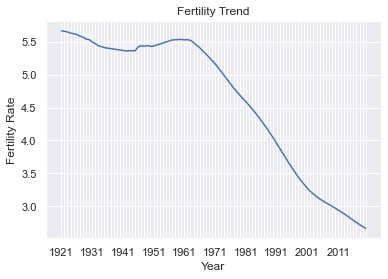

In [72]:
fig_1 = sns.lineplot(data=df_frt_1.mean());
for ind, label in enumerate(fig_1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig_1.set(xlabel='Year', ylabel='Fertility Rate')
plt.title('Fertility Trend');

The graph indicates that the fertility rates are decreasing deastically over the past century.

In [73]:
df_frt_1.describe()

,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,5.667258,5.658763,5.648548,5.631774,5.621720,5.612204,5.584677,5.571828,5.541613,5.532957,...,2.942366,2.913978,2.883817,2.851452,2.818548,2.785215,2.753172,2.721935,2.691828,2.662742
std,1.273883,1.298727,1.315861,1.344712,1.362273,1.378751,1.414588,1.426415,1.456703,1.462323,...,1.494109,1.462148,1.432846,1.403559,1.374949,1.346064,1.316921,1.287927,1.259074,1.231229
min,2.370000,2.400000,2.380000,2.280000,2.200000,2.100000,1.980000,1.990000,1.920000,1.880000,...,1.070000,1.180000,1.070000,1.150000,1.170000,1.190000,1.210000,1.220000,1.230000,1.230000
25%,5.130000,5.130000,5.117500,5.040000,4.972500,4.897500,4.825000,4.745000,4.695000,4.667500,...,1.790000,1.782500,1.790000,1.780000,1.770000,1.750000,1.750000,1.750000,1.740000,1.732500
50%,6.045000,6.045000,6.040000,6.020000,6.030000,6.065000,6.085000,6.095000,6.040000,5.975000,...,2.430000,2.395000,2.370000,2.350000,2.320000,2.300000,2.280000,2.255000,2.235000,2.200000
75%,6.610000,6.627500,6.627500,6.637500,6.637500,6.640000,6.640000,6.637500,6.647500,6.650000,...,3.997500,3.967500,3.922500,3.865000,3.807500,3.735000,3.662500,3.600000,3.530000,3.487500
max,7.840000,7.830000,7.820000,7.810000,7.800000,7.650000,7.500000,7.400000,7.450000,7.510000,...,7.460000,7.420000,7.380000,7.340000,7.290000,7.240000,7.180000,7.130000,7.070000,7.000000


Now let's see the relationship between fertility rate and life expectancy.

In [74]:
df_le_1 = df_le_1.set_index(['country'])

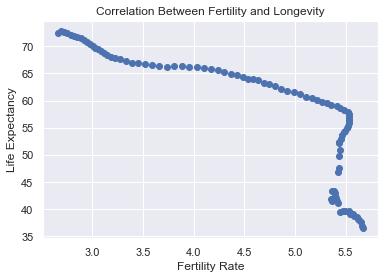

In [75]:
fig_2 = plt.scatter(df_frt_1.mean(), df_le_1.mean());
plt.xlabel('Fertility Rate')
plt.ylabel('Life Expectancy')
plt.title('Correlation Between Fertility and Longevity');

In [76]:
np.corrcoef(df_frt_1.mean(), df_le_1.mean())

array([[ 1.        , -0.82838701],
       [-0.82838701,  1.        ]])

It looks like there is a strong poistive correlation between firtility rates and life expectancy, which means that **populations with high fertility rates seem to live shorter than populations with low fertility rate.**

### Does happier people live longer?

Now, let's see the trend of life expectancy over the past century.

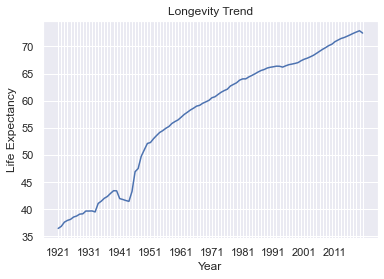

In [77]:
fig_3 = sns.lineplot(data=df_le_1.mean());
for ind, label in enumerate(fig_3.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig_3.set(xlabel='Year', ylabel='Life Expectancy')
plt.title('Longevity Trend');

The graph indicates that life expectancy have doubled over the past century.

In [78]:
df_le_2.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.662774,70.030657,70.435036,70.766423,71.189051,71.377372,71.945985,72.272993,72.60219,72.819708,73.060584,73.353285,73.609489,73.837226,74.054745
std,9.119461,8.929549,8.717710,8.528389,8.260027,8.712533,7.933622,7.754757,7.61289,7.561132,7.380562,7.216037,7.057390,6.872163,6.697069
min,46.800000,47.400000,48.200000,48.900000,50.200000,32.500000,53.600000,53.600000,54.00000,54.900000,55.800000,56.600000,57.300000,57.900000,58.400000
25%,63.200000,63.700000,64.400000,65.000000,65.400000,65.700000,66.000000,66.200000,66.80000,67.200000,67.700000,67.800000,68.000000,68.400000,68.800000
50%,72.500000,72.700000,72.900000,73.300000,73.400000,73.700000,73.900000,74.200000,74.30000,74.500000,74.700000,74.900000,75.100000,75.200000,75.000000
75%,77.200000,77.700000,78.200000,78.100000,78.000000,78.100000,78.700000,78.600000,78.70000,79.000000,79.300000,79.500000,79.600000,79.900000,80.000000
max,82.500000,82.800000,82.900000,83.100000,83.300000,83.300000,83.200000,83.600000,83.90000,84.100000,84.300000,84.500000,84.700000,84.800000,84.800000


Now let's see the relationship between life expectancy and happiness score.

In [79]:
df_le_2 = df_le_2.set_index(['country'])

In [80]:
df_hp_2 = df_hp_2.set_index(['country'])

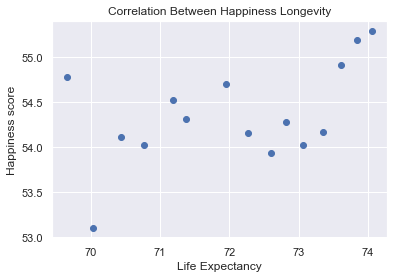

In [81]:
fig_4 = plt.scatter(df_le_2.mean(), df_hp_2.mean());
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness score')
plt.title('Correlation Between Happiness Longevity');

In [82]:
np.corrcoef(df_le_2.mean(), df_hp_2.mean())

array([[1.        , 0.49704649],
       [0.49704649, 1.        ]])

It looks like **there is a weak positive correlation between life expectancy and happiness**, we should note that the highest happiness score occured with the highest life expectancy, however the data seem to be insufficient to conclude that no correlation exists.

### Is there any correlation between longevity and suicide?

Before we answer the question, let's first see the trend of suicide rates over the past 67 years.

In [83]:
df_su_3 = df_su_3.set_index(['country'])

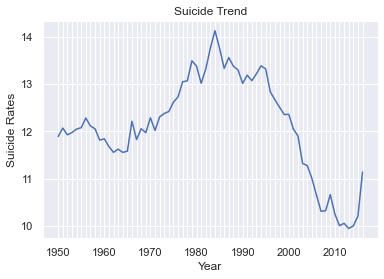

In [84]:
fig_5 = sns.lineplot(data=df_su_3.mean());
for ind, label in enumerate(fig_5.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig_5.set(xlabel='Year', ylabel='Suicide Rates')
plt.title('Suicide Trend');

The trend seems to be fluctuating, and the rates were the highest in the 1980s and 1990s, but generally it has decreased in the 21st century.

In [85]:
df_su_3.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,11.889189,12.067568,11.924324,11.972973,12.045946,12.075676,12.278378,12.110811,12.051351,11.813514,...,10.310811,10.321622,10.662162,10.254054,10.005405,10.056757,9.948649,10.002703,10.205405,11.137838
std,7.192851,7.339053,7.225203,7.365522,7.502355,7.369170,7.237293,7.296338,7.338582,7.279009,...,5.014245,5.579284,5.471459,5.106183,4.973482,4.558054,5.006919,4.424834,4.708441,5.321620
min,2.600000,2.600000,2.100000,2.100000,2.000000,2.400000,2.600000,2.500000,2.700000,2.600000,...,2.400000,2.600000,2.700000,2.600000,3.200000,3.200000,3.200000,3.200000,3.200000,3.000000
25%,6.600000,6.600000,6.500000,6.700000,6.600000,6.400000,6.700000,6.400000,6.600000,7.000000,...,6.700000,6.600000,7.100000,6.700000,6.600000,6.800000,6.600000,6.700000,7.100000,7.100000
50%,11.200000,10.200000,10.500000,10.000000,10.700000,10.300000,10.800000,10.000000,10.800000,9.700000,...,9.900000,10.000000,10.300000,9.800000,8.900000,9.200000,9.900000,9.500000,10.000000,11.200000
75%,15.100000,15.100000,15.100000,16.100000,14.800000,16.100000,16.100000,16.100000,14.900000,15.900000,...,13.000000,12.600000,11.400000,13.100000,11.600000,11.900000,11.700000,12.200000,11.900000,13.000000
max,32.700000,32.700000,32.700000,32.700000,32.700000,32.700000,32.700000,32.700000,32.700000,32.700000,...,27.400000,30.100000,30.400000,27.600000,28.000000,25.700000,30.900000,26.100000,25.200000,24.700000


Now let's see the correlation between life expectancy and suicide rates.

In [86]:
df_le_3 = df_le_3.set_index(['country'])

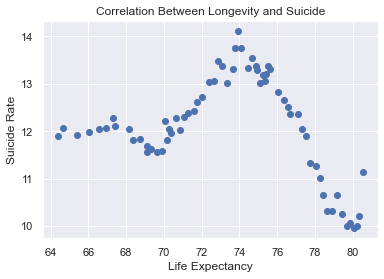

In [87]:
fig_6 = plt.scatter(df_le_3.mean(), df_su_3.mean());
plt.xlabel('Life Expectancy')
plt.ylabel('Suicide Rate')
plt.title('Correlation Between Longevity and Suicide');

In [88]:
np.corrcoef(df_le_3.mean(), df_su_3.mean())

array([[ 1.      , -0.306597],
       [-0.306597,  1.      ]])

That's odd, the scatter plot looks similar to the trend of suicide rates. Suicide rate is the lowest in populations with 80 years of life expectancy.
From that graph, it seems like **there is a weak negative correlation between suicide rates and life expectancy.**

### Is suicide rate affected by the circumstances of people's lifes?

Now let's see the trend of happiness score for the data we have. 

In [89]:
df_hp_4 = df_hp_4.set_index(['country'])

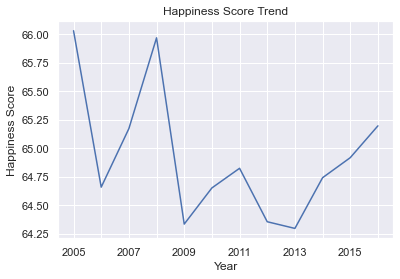

In [90]:
fig_7 = sns.lineplot(data=df_hp_4.mean());
for ind, label in enumerate(fig_7.get_xticklabels()):
    if ind % 2 == 0:  # every 2nd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig_7.set(xlabel='Year', ylabel='Happiness Score');
plt.title('Happiness Score Trend');

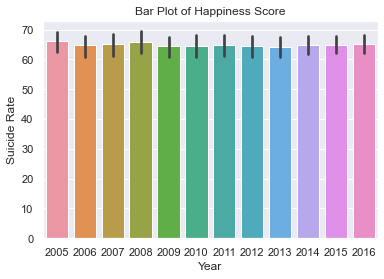

In [91]:
sns.barplot(data=df_hp_4)
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Bar Plot of Happiness Score');

It looks like the trend is stable, varying between 66 and 64. But generally the score is decreasing in the last 8 years.

In [92]:
df_hp_4.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,66.031034,64.658621,65.172414,65.968966,64.334483,64.651724,64.824138,64.355172,64.296552,64.741379,64.917241,65.196552
std,9.518857,9.650371,10.334751,10.091726,9.774320,10.288503,10.243383,9.958686,10.251602,8.913854,8.084114,8.241640
min,42.500000,42.500000,38.400000,42.500000,42.500000,39.100000,38.800000,42.200000,39.900000,44.400000,48.700000,48.400000
25%,56.700000,58.300000,58.900000,57.200000,57.700000,57.700000,56.500000,58.400000,57.500000,59.200000,58.800000,59.400000
50%,69.800000,65.800000,68.300000,69.900000,63.300000,68.000000,68.700000,66.500000,66.700000,67.600000,66.100000,65.900000
75%,73.200000,73.100000,72.400000,73.800000,73.200000,73.600000,73.800000,72.500000,73.600000,72.900000,72.900000,72.300000
max,80.200000,77.000000,78.300000,79.700000,76.800000,77.700000,77.900000,77.800000,75.900000,75.100000,76.000000,76.600000


Now let's make a scatter plot between suicide rate and happiness score.

In [93]:
df_su_4 = df_su_4.set_index(['country'])

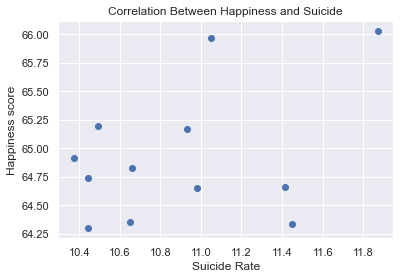

In [94]:
fig_8 = plt.scatter(df_su_4.mean(), df_hp_4.mean());
plt.xlabel('Suicide Rate')
plt.ylabel('Happiness score')
plt.title('Correlation Between Happiness and Suicide');

In [95]:
np.corrcoef(df_su_4.mean(), df_hp_4.mean())

array([[1.        , 0.38856645],
       [0.38856645, 1.        ]])

Based on that graph, it seems that **a slight positive correlation exists between suicide rate and happiness score.**

<a id='conclusions'></a>
## Conclusions

We did an analysis on 4 different datasets, fertility rate, life expectancy, happiness score and suicide rate.
Initially we had 4 questions we needed to answer using the dataset we have.
Using single-variable (1d) and multiple-variable (2d) explorations, we investigated each dataset and tried to answer the questions.

**Results**: Based on the analysis we concluded the following findings: 
1. Populations with high fertility rate seem to live shorter than populations with low fertility rate.
2. There is a weak positive correlation between life expectancy and happiness.
3. There is a weak negative correlation between suicide rates and life expectancy.
4. A slight positive correlation correlation exists between suicide rate and happiness score.

**limitations**: There are many limitations to our analysis which include:
1. The happiness score dataset was collected over few years and not many countries.
2. Calculations and plots were made using the mean of the data, which doesn't represent each country individually.
3. The accuracy of the data was affected by filling missing values with the averages.